## Observations and Insights 

In [290]:
%matplotlib notebook

#OBSERVATIONS---------------
    # It looks like there have been multiple studies to compare different drug regimens to Capumolin. Of all the drugs
    # It has the lowest average tumor size with fairly consistent results due to its low standard deviation and standard error 
    # of the rest of the drugs
    
    #The study is well representative and does a good job of eliminating as many bias as possible as seen in the large sample
    # sizes accross all drug regimens, as well as the equal distribution of male and female rats. This tells us that its 
    #reliable to study the capumolin's trends on its own. There is one thing to take note and that is there might be a chance that
    #the capumolin tumor volume average is lower because specimens may have started with a lower tumor volume, but we would need
    #to examine the data further to determine that
    
    #Lastly, from the Capumolin alone, we can see that there is a trend in which we can see that a heavier rat generally gave us
    #a larger tumor size, but the trends are all the same in that it decreases the tumor size regardless of the starting tumor size
    #(at least for this sample size), but we don't know if it will deviate from the linear regression for extremely small sizes
    #For example, we don't know if there is a minimum tumor size yet

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [291]:
# Checking the number of mice.
total_mice = len(data["Mouse ID"].unique())
print(f"There is a total of {total_mice} mice in the study")

There is a total of 249 mice in the study


In [292]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped = data.groupby("Mouse ID")
groupeddf = pd.DataFrame(grouped["Timepoint"].value_counts())
groupeddf.loc[groupeddf["Timepoint"] >= 2]

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [293]:
# Optional: Get all the data for the duplicate mouse ID. 
data.loc[data["Mouse ID"] == "g989",:]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [294]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = data.loc[data["Mouse ID"] != "g989"]

In [295]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(cleaned_data["Mouse ID"].unique())
print(f" there are now {total_mice} mice in the data")
total_measurements = len(cleaned_data["Mouse ID"])
print(f" there are {total_measurements} total measurements")

 there are now 248 mice in the data
 there are 1880 total measurements


## Summary Statistics

In [296]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group = cleaned_data.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = round(regimen_group["Tumor Volume (mm3)"].mean(),2)
tumor_median = round(regimen_group["Tumor Volume (mm3)"].median(),2)
tumor_var = round(regimen_group["Tumor Volume (mm3)"].var(),2)
tumor_std = round(regimen_group["Tumor Volume (mm3)"].std(),2)
tumor_sem = round(regimen_group["Tumor Volume (mm3)"].sem(),2)

stats_sum = {
    "Tumor Size Mean (mm3)" : tumor_mean,
    "Tumor Size Median (mm3)" : tumor_median,
    "Tumor Size Var (mm3)" : tumor_var,
    "Tumor Size Std (mm3)" :tumor_std,
    "Tumor Size Standard Error (mm3)" : tumor_sem
}

pd.DataFrame(stats_sum)
# Assemble the resulting series into a single summary dataframe.



,Tumor Size Mean (mm3),Tumor Size Median (mm3),Tumor Size Var (mm3),Tumor Size Std (mm3),Tumor Size Standard Error (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [300]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats_sum2 = round(regimen_group["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]),2)

## Bar and Pie Charts

In [301]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_group["Timepoint"].count().plot.bar("Drug Regimen", "Number of Measurements");

<IPython.core.display.Javascript object>

In [302]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_array = np.arange(0, len(data["Drug Regimen"].unique()))
plt.bar(x_array, regiment_group["Timepoint"].count());
plt.xticks(x_array, data["Drug Regimen"].unique(), rotation = "vertical");
plt.xlabel("Drug Regimen");
plt.ylabel("Number of Measurements");

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


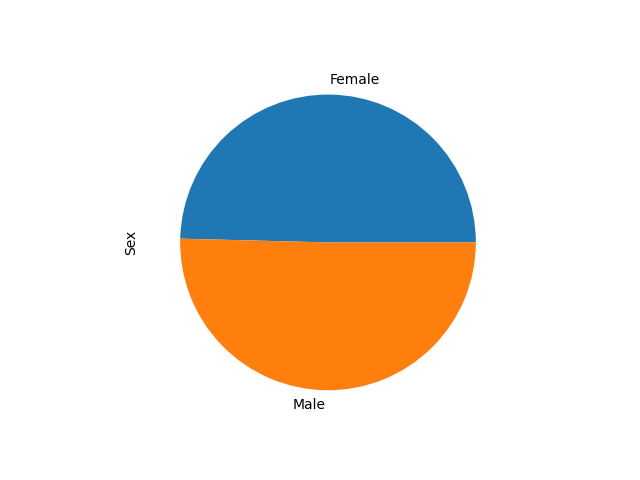

In [303]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#this uses first deletes the duplicate mouse IDs and then group them by sex. Then we count the number of mice in each sex
Sex_groups = cleaned_data.drop_duplicates(subset=["Mouse ID"]).groupby("Sex")

Sex_groups["Sex"].count().plot.pie();


In [304]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_count = Sex_groups["Sex"].count()
labels = ["Male","Female"]
sizes = [Sex_count[1], Sex_count[0]]
colors = ["cyan", "pink"]

plt.pie(sizes, explode=(.07,0), labels=labels, colors=colors, autopct="%.1f%%", shadow=True,startangle=180);
Sex_count

<IPython.core.display.Javascript object>

Sex
Female    123
Male      125
Name: Sex, dtype: int64

## Quartiles, Outliers and Boxplots

In [305]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = cleaned_data.groupby("Mouse ID")
MaxTimepoint = pd.DataFrame(mouse_group["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_sizes = cleaned_data.merge(MaxTimepoint, on=["Mouse ID","Timepoint"])
final_tumor_sizes

#Final Tumor Volume
final_tumor_sizes = final_tumor_sizes.loc[(final_tumor_sizes["Drug Regimen"] == "Capomulin") \
                                          |(final_tumor_sizes["Drug Regimen"] == "Ramicane") \
                                          |(final_tumor_sizes["Drug Regimen"] == "Infubinol") \
                                          |(final_tumor_sizes["Drug Regimen"] == "Ceftamin")]
final_tumor_sizes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [306]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_Regimens = final_tumor_sizes["Drug Regimen"].unique()

for x in Drug_Regimens:
# Create empty list to fill with tumor vol data (for plotting)
    tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_spec = final_tumor_sizes.loc[final_tumor_sizes["Drug Regimen"] == x]
    
    
    # add subset 
    tumor_vol = drug_spec["Tumor Volume (mm3)"]
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    upperbound = quartiles[0.75] + IQR*1.5
    lowerbound = quartiles[0.25] -IQR*1.5
    tumor_vol = pd.DataFrame(tumor_vol)
    
    outliers = tumor_vol.loc[(tumor_vol["Tumor Volume (mm3)"] > upperbound) | (tumor_vol["Tumor Volume (mm3)"] < lowerbound)]
    print(f"there are {len(outliers)} outliers in " + x +" data ")


there are 0 outliers in Ramicane data 
there are 0 outliers in Capomulin data 
there are 1 outliers in Infubinol data 
there are 0 outliers in Ceftamin data 


Text(0, 0.5, 'Tumor Volume (mm3)')

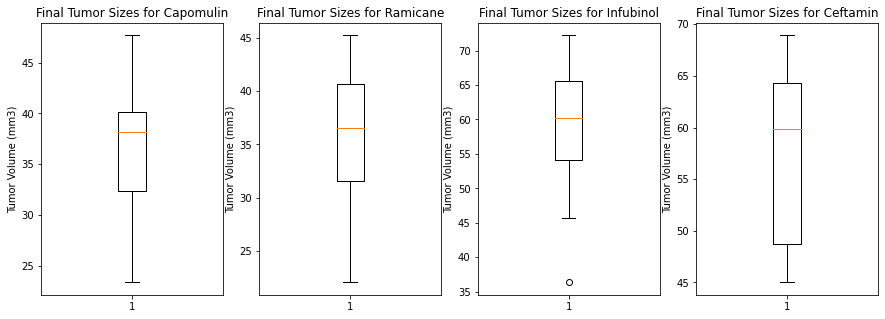

In [249]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (15,5))
ax1.boxplot((final_tumor_sizes.loc[final_tumor_sizes["Drug Regimen"] == "Capomulin"])["Tumor Volume (mm3)"]);
ax1.set_title("Final Tumor Sizes for Capomulin")
ax1.set_ylabel("Tumor Volume (mm3)")

ax2.boxplot((final_tumor_sizes.loc[final_tumor_sizes["Drug Regimen"] == "Ramicane"])["Tumor Volume (mm3)"]);
ax2.set_title("Final Tumor Sizes for Ramicane")
ax2.set_ylabel("Tumor Volume (mm3)")

ax3.boxplot((final_tumor_sizes.loc[final_tumor_sizes["Drug Regimen"] == "Infubinol"])["Tumor Volume (mm3)"]);
ax3.set_title("Final Tumor Sizes for Infubinol")
ax3.set_ylabel("Tumor Volume (mm3)")

ax4.boxplot((final_tumor_sizes.loc[final_tumor_sizes["Drug Regimen"] == "Ceftamin"])["Tumor Volume (mm3)"]);
ax4.set_title("Final Tumor Sizes for Ceftamin")
ax4.set_ylabel("Tumor Volume (mm3)")

## Line and Scatter Plots

<IPython.core.display.Javascript object>


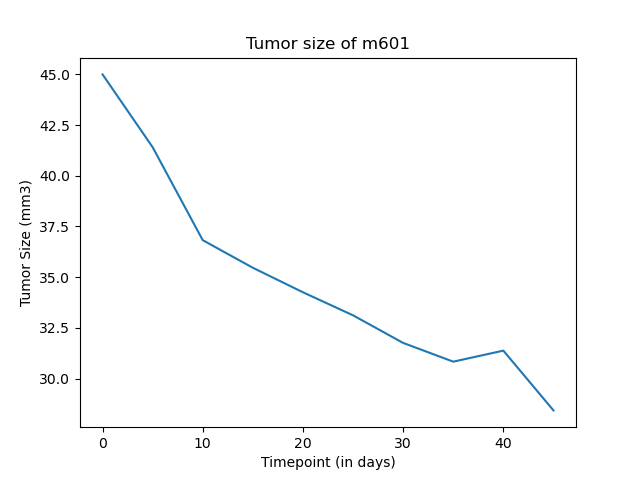

In [307]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_vol_capm601 = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin") & (cleaned_data["Mouse ID"] == "m601") ]
plt.plot(tumor_vol_capm601["Timepoint"],tumor_vol_capm601["Tumor Volume (mm3)"]);
plt.xlabel("Timepoint (in days)");
plt.ylabel("Tumor Size (mm3)");
plt.title("Tumor size of m601");

<IPython.core.display.Javascript object>


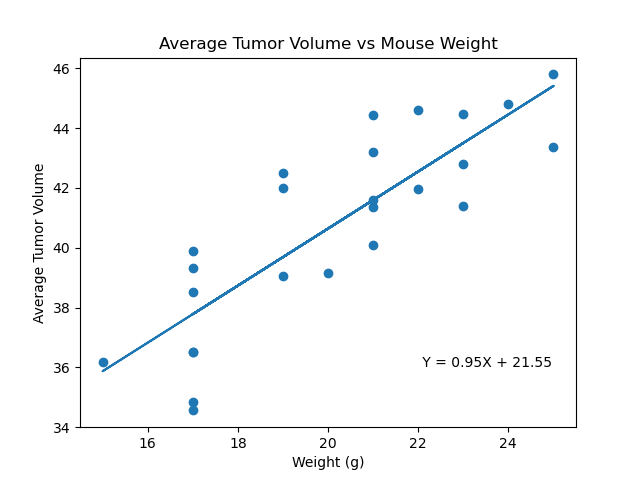

In [312]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_vol_cap = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin")]
Average_tumor_size = pd.DataFrame(tumor_vol_cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
tumor_vol_cap_weights = tumor_vol_cap.drop_duplicates(subset="Mouse ID")
tumor_vol_cap_weights = tumor_vol_cap_weights[["Mouse ID", "Weight (g)"]]


combined_df = pd.merge(Average_tumor_size, tumor_vol_cap_weights, on="Mouse ID")
combined_df

plt.scatter(combined_df["Weight (g)"], combined_df["Tumor Volume (mm3)"]);
plt.title("Average Tumor Volume vs Mouse Weight");
plt.xlabel("Weight (g)");
plt.ylabel("Average Tumor Volume");

## Correlation and Regression

In [313]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(combined_df["Weight (g)"],combined_df["Tumor Volume (mm3)"])
corr = st.pearsonr(combined_df["Weight (g)"],combined_df["Tumor Volume (mm3)"])

print(f"the correlation coefficient of the scatter plot is {round(corr[0],2)}")
lin_model = slope*combined_df["Weight (g)"] + intercept
line_equation = f" Y = {round(slope,2)}X + {round(intercept,2)}"
plt.plot(combined_df["Weight (g)"], lin_model);
plt.annotate(line_equation,(22,36));

the correlation coefficient of the scatter plot is 0.84


Text(22, 36, ' Y = 0.95X + 21.55')